# Lung Cancer Prediction

In this study, we tried to predict Lung Cancer using 6 different algorithm:

Logistic regression classification
SVM (Support Vector Machine) classification
Naive bayes classification
Decision tree classification
Random forest classification
K-Nearest Neighbor classification
Predictor variable use in classifying lung cancer:

Age Smokes AreaQ Alkhol

In [89]:
#Importing the Libraries

In [90]:
import pandas as pd
import numpy as np

In [91]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [92]:
#Reading the Dataset:
df = pd.read_csv("C:/Users/user/Downloads/lung_cancer_examples.csv")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [94]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [95]:
df.describe(include = "all")

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
count,59,59,59.000000,59.000000,59.000000,59.000000,59.000000
unique,49,49,NaN,NaN,NaN,NaN,NaN
top,Katharine,Hepburn,NaN,NaN,NaN,NaN,NaN
freq,4,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,42.627119,15.067797,5.203390,3.237288,0.474576
std,NaN,NaN,16.235230,7.984607,2.461984,2.380517,0.503640
min,NaN,NaN,18.000000,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,29.000000,10.000000,3.000000,1.000000,0.000000
50%,NaN,NaN,39.000000,15.000000,5.000000,3.000000,0.000000
75%,NaN,NaN,55.000000,20.000000,7.500000,5.000000,1.000000


In [96]:
#check for any null values
print(pd.isnull(df).sum())

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [97]:
# Group the dataset by Age and using sum method to get the Result

Result = df[['Age','Result']].groupby('Age').sum()
Result.reset_index(level=0,inplace=True)
Result.sort_values(by='Result',ascending=False,inplace=True)
Result.head(10)

,Age,Result
30,62,4
36,77,2
26,55,2
17,42,1
35,75,1
34,73,1
33,69,1
32,68,1
31,63,1
29,59,1


In [98]:
df1 = pd.DataFrame(Result)
 
X = list(df1.iloc[:, 0])
Y = list(df1.iloc[:, 1])

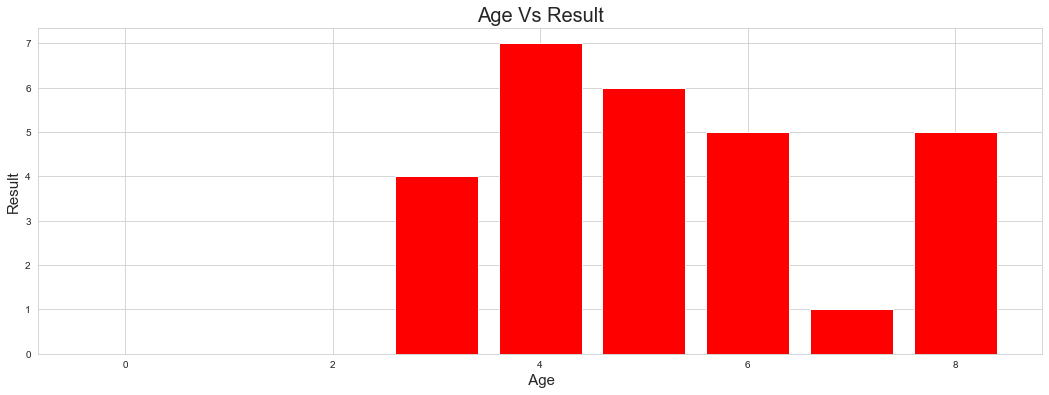

In [167]:
# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.title("Age Vs Result",fontsize=20)
plt.xlabel(" Age",fontsize=15)
plt.ylabel("Result",fontsize=15)
  
# Show the plot
plt.show()
plt.rcParams['figure.figsize']=(18,6)

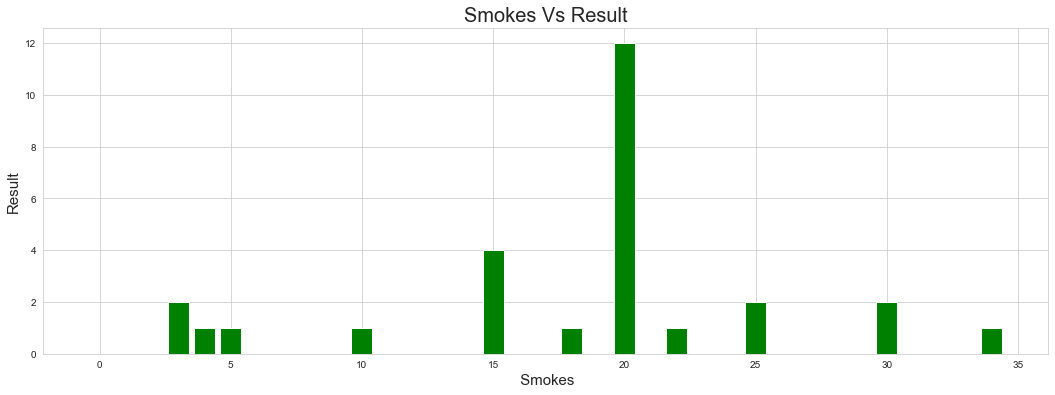

In [100]:
# Group the dataset by  and using sum method to get the Result

Smokes = df[['Smokes','Result']].groupby('Smokes').sum()
Smokes.reset_index(level=0,inplace=True)
Smokes.sort_values(by='Result',ascending=False,inplace=True)

df2 = pd.DataFrame(Smokes)
 
X = list(df2.iloc[:, 0])
Y = list(df2.iloc[:, 1])


# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Smokes Vs Result",fontsize=20)
plt.xlabel(" Smokes",fontsize=15)
plt.ylabel("Result",fontsize=15)
  
# Show the plot
plt.show()
plt.rcParams['figure.figsize']=(18,6)



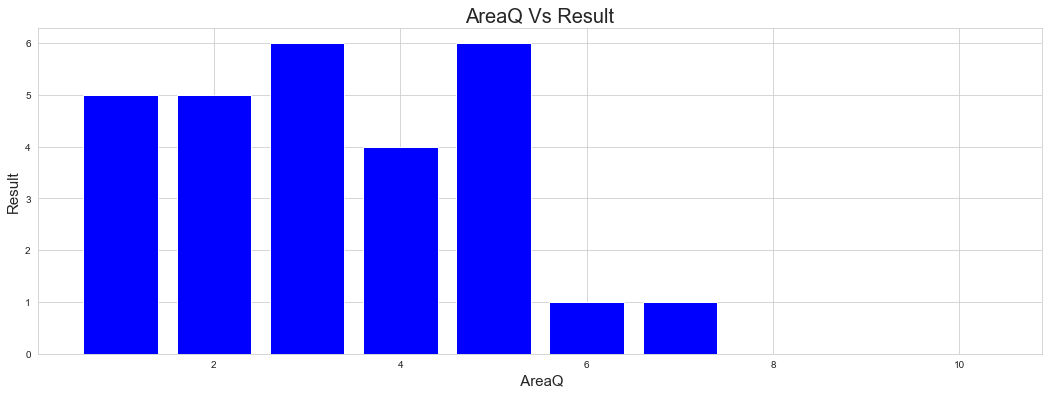

In [101]:
# Group the dataset by AreaQ  and using sum method to get the Result

AreaQ = df[['AreaQ','Result']].groupby('AreaQ').sum()
AreaQ.reset_index(level=0,inplace=True)
AreaQ.sort_values(by='Result',ascending=False,inplace=True)

df3 = pd.DataFrame(AreaQ)
 
X = list(df3.iloc[:, 0])
Y = list(df3.iloc[:, 1])


# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title("AreaQ Vs Result",fontsize=20)
plt.xlabel(" AreaQ",fontsize=15)
plt.ylabel("Result",fontsize=15)
  
# Show the plot
plt.show()
plt.rcParams['figure.figsize']=(18,6)

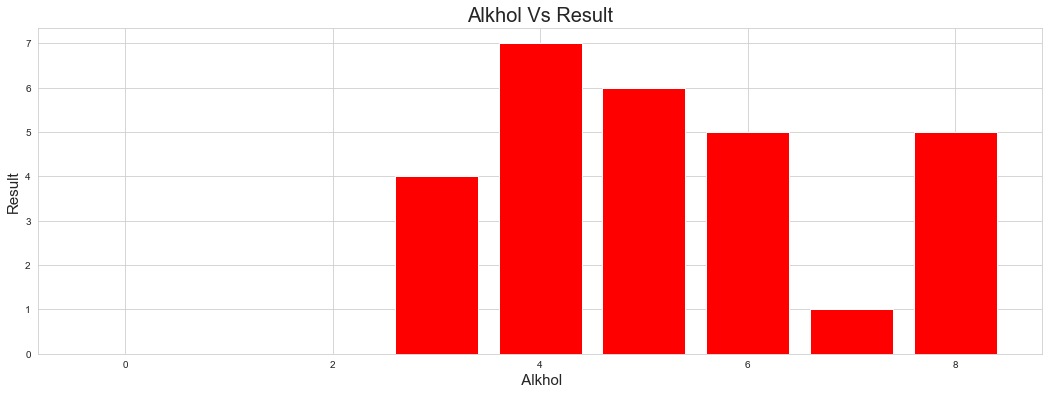

In [102]:
# Group the dataset by Alkhol  and using sum method to get the Result

Alkhol = df[['Alkhol','Result']].groupby('Alkhol').sum()
Alkhol.reset_index(level=0,inplace=True)
Alkhol.sort_values(by='Result',ascending=False,inplace=True)

df4 = pd.DataFrame(Alkhol)
 
X = list(df4.iloc[:, 0])
Y = list(df4.iloc[:, 1])


# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.title("Alkhol Vs Result",fontsize=20)
plt.xlabel(" Alkhol",fontsize=15)
plt.ylabel("Result",fontsize=15)
  
# Show the plot
plt.show()
plt.rcParams['figure.figsize']=(18,6)



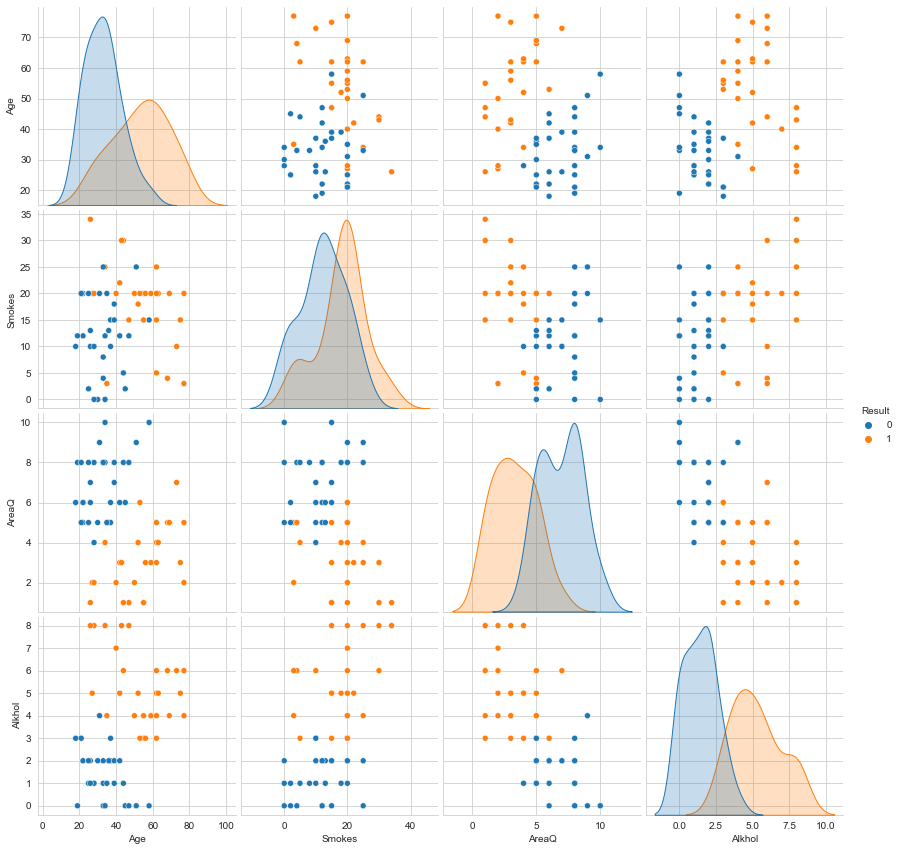

In [103]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Result",size=3);
plt.show()

Text(0.5, 1.0, 'Correlation ')

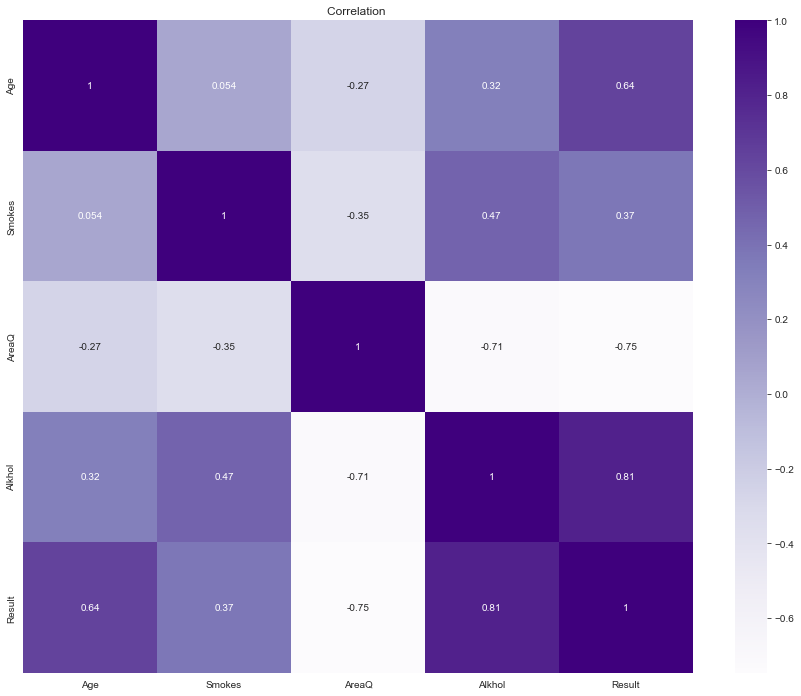

In [104]:
#plot correlation matrix
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples', annot=True)
r.set_title("Correlation ")

In [105]:
corr.sort_values(by=["Result"],ascending=False)

,Age,Smokes,AreaQ,Alkhol,Result
Result,0.637726,0.373444,-0.746621,0.810439,1.000000
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621


# 1. Logistic regression classification

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input (X) belongs to the default class (Y=1)) (P(X)=P(Y=1|X)). In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Started from make an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. Trained the logistic regression model with the training data, and then applied such model to the test data.

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [107]:
data = df.drop(['Name','Surname'], axis = 1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [109]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [110]:
predictions = logmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [111]:
accuracy_logmodel = logmodel.score(X_test,y_test)
print(accuracy_logmodel*100,'%')

100.0 %


In [112]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  0],
       [ 0,  1]], dtype=int64)

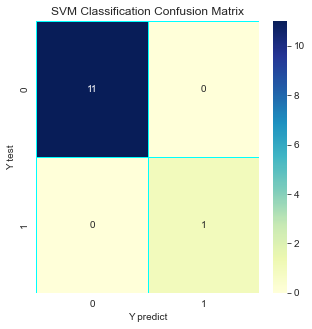

In [115]:
logmodel_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logmodel_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# 2. SVM (Support Vector Machine) classification

SVMs (Support Vector Machine) have shown a rapid proliferation during the last years. The learning problem setting for SVMs corresponds to a some unknown and nonlinear dependency (mapping, function)  y=f(x)  between some high-dimensional input vector  x  and scalar output  y . It is noteworthy that there is no information on the joint probability functions, therefore, a free distribution learning must be carried out. The only information available is a training data set  D=(xi,yi)∈X×Y,i=1 ,  l , where  l  stands for the number of the training data pairs and is therefore equal to the size of the training data set  D , additionally,  yi  is denoted as  di , where  d  stands for a desired (target) value. Hence, SVMs belong to the supervised learning techniques.

From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.

In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [117]:
data = df.drop(['Name','Surname'], axis = 1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [119]:
svmmodel = SVC()
svmmodel.fit(X_train,y_train)

SVC()

In [120]:
predictions = svmmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [121]:
accuracy_svmmodel = svmmodel.score(X_test,y_test)
print(accuracy_svmmodel*100,'%')

100.0 %


In [122]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  0],
       [ 0,  1]], dtype=int64)

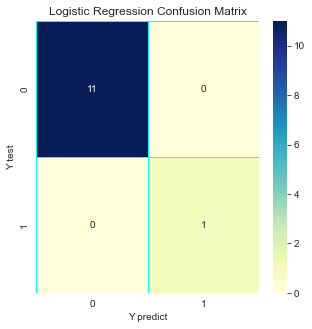

In [125]:
svmcla_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# 3. Naive bayes classification

The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features. Thus, using Bayes theorem  (P(X|Y)=P(Y|X)P(X)P(Y)) , we can find the probability of  X  happening, given that  Y  has occurred. Here,  Y  is the evidence and  X  is the hypothesis. The assumption made here is that the presence of one particular feature does not affect the other (the predictors/features are independent). Hence it is called naive. In this case we will assume that we assume the values are sampled from a Gaussian distribution and therefore we consider a Gaussian Naive Bayes.

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [127]:
data = df.drop(['Name','Surname'], axis = 1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [129]:
nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)

GaussianNB()

In [130]:
predictions = nbmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [131]:
accuracy_nbmodel = nbmodel.score(X_test,y_test)
print(accuracy_nbmodel*100,'%')

100.0 %


In [132]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  0],
       [ 0,  1]], dtype=int64)

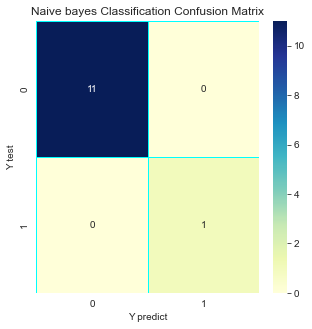

In [135]:
nbmodel_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbmodel_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# 4. Decision tree classification

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively.

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [137]:
data = df.drop(['Name','Surname'], axis = 1)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [139]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
predictions = dtmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [141]:
accuracy_dtmodel = dtmodel.score(X_test,y_test)
print(accuracy_dtmodel*100,'%')

91.66666666666666 %


In [142]:
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.50      1.00      0.67         1

    accuracy                           0.92        12
   macro avg       0.75      0.95      0.81        12
weighted avg       0.96      0.92      0.93        12



In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[10,  1],
       [ 0,  1]], dtype=int64)

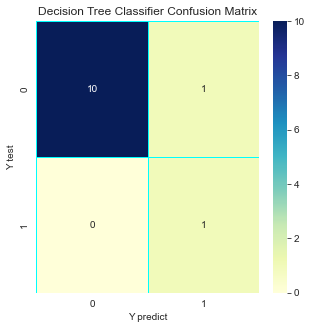

In [145]:
dtmodel_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtmodel_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# 5. Random forest classification

Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method. The essential idea of bagging is to average many noisy but approximately impartial models, and therefore reduce the variation. Each tree is constructed using the following algorithm:

Let  N  be the number of test cases,  M  is the number of variables in the classifier.
Let  m  be the number of input variables to be used to determine the decision in a given node;  m<M .
Choose a training set for this tree and use the rest of the test cases to estimate the error.
For each node of the tree, randomly choose  m  variables on which to base the decision. Calculate the best partition of the training set from the  m  variables.
For prediction a new case is pushed down the tree. Then it is assigned the label of the terminal node where it ends. This process is iterated by all the trees in the assembly, and the label that gets the most incidents is reported as the prediction. We define the number of trees in the forest in 100.

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [147]:
data = df.drop(['Name','Surname'], axis = 1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [149]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

RandomForestClassifier()

In [150]:
predictions = rfmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [151]:
accuracy_rfmodel = rfmodel.score(X_test,y_test)
print(accuracy_rfmodel*100,'%')

91.66666666666666 %


In [152]:
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.50      1.00      0.67         1

    accuracy                           0.92        12
   macro avg       0.75      0.95      0.81        12
weighted avg       0.96      0.92      0.93        12



In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[10,  1],
       [ 0,  1]], dtype=int64)

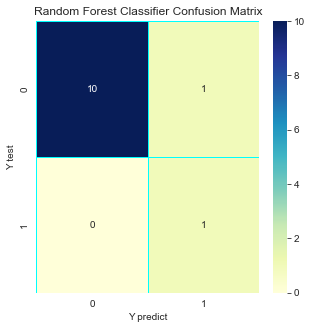

In [155]:
rfmodel_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfmodel_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# 6. K-Nearest Neighbor classification

K-Nearest neighbors is a technique that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). This technique is non-parametric since there are no assumptions for the distribution of underlying data and it is lazy since it does not need any training data point model generation. All the training data used in the test phase. This makes the training faster and the test phase slower and more costlier. In this technique, the number of neighbors k is usually an odd number if the number of classes is 2. For finding closest similar points, find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [157]:
data = df.drop(['Name','Surname'], axis = 1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [159]:
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [160]:
predictions = knnmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [161]:
accuracy_knnmodel = knnmodel.score(X_test,y_test)
print(accuracy_knnmodel*100,'%')                               

83.33333333333334 %


In [162]:
predictions

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.33      1.00      0.50         1

    accuracy                           0.83        12
   macro avg       0.67      0.91      0.70        12
weighted avg       0.94      0.83      0.87        12



In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[9, 2],
       [0, 1]], dtype=int64)

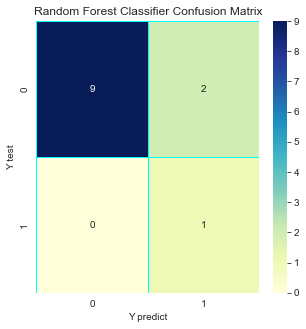

In [165]:
knnmodel_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knnmodel_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Comparison of classification techniques

In [166]:
Testscores = pd.Series([(accuracy_logmodel*100,'%'),(accuracy_svmmodel*100,'%'),(accuracy_nbmodel*100,'%'),(accuracy_dtmodel*100,'%'),(accuracy_rfmodel*100,'%'),(accuracy_knnmodel*100,'%')], 
                        index=['Logistic Regression Score','Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score                   (100.0, %)
Support Vector Machine Score                (100.0, %)
Naive Bayes Score                           (100.0, %)
Decision Tree Score             (91.66666666666666, %)
Random Forest Score             (91.66666666666666, %)
K-Nearest Neighbour Score       (83.33333333333334, %)
dtype: object
